In [1]:
from perceptron import Perceptron
from perceptron2 import SigmoidNeuron
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load digits 0 and 1
digits = load_digits(n_class=2)
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

#Normalisation
X_train/=16
X_test/=16

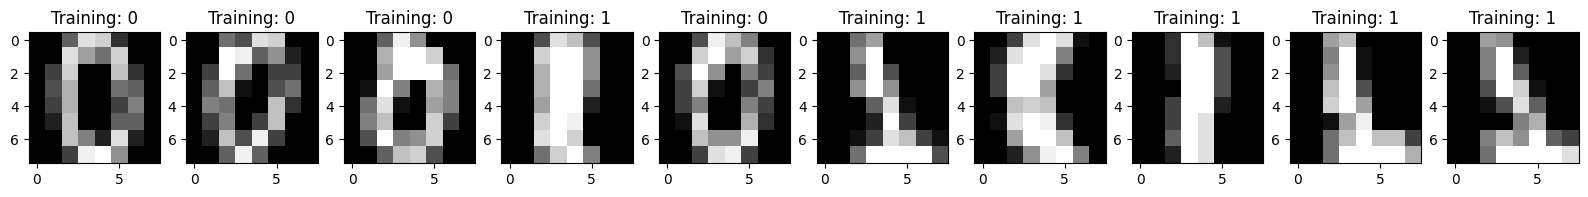

In [3]:
#visualisation
num_digits = 10

# Set the figure size
plt.figure(figsize=(20, 4))

for i in range(num_digits):
    # Display images
    ax = plt.subplot(1, num_digits, i + 1)
    plt.imshow(X_train[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.title("Training: %i" % y_train[i])

plt.show()

In [4]:
#give the accuracy of the model.
def rate_accuracy(average, y):
    y_hat = []
    threshold = 0.5 
    for a in average:
        y_hat.append(1 if a > threshold else 0)
    count = sum(1 for k in range(len(y_hat)) if y_hat[k] == y[k])
    return count / len(y_hat)
    

In [ ]:
#First perceptron with log loss function in cost function.

In [39]:
#perceptron  with gradient descent method 

perceptron= Perceptron(X_train,y_train,1,momentum=0.7,methode="gradient")
accuracy=0
list_accuracy_gradient=[]
list_index_gradient=[]
c=0
while c!=20:
    c+=1
    perceptron.train(1)
    average = perceptron.predict(X_test)
    accuracy = rate_accuracy(average,y_test)
    list_accuracy_gradient.append(accuracy)
    list_index_gradient.append(c)

#Print the average of accuracy
print("mean :",sum(list_accuracy_gradient)/len(list_accuracy_gradient))

mean : 0.9369747899159664


In [92]:
#perceptron with momentum method

perceptron= Perceptron(X_train,y_train,1,momentum=0.7,methode="momentum")
accuracy=0
list_accuracy_momentum=[]
list_index_momentum=[]
c=0
while c!=20:
    c+=1
    perceptron.train(1)
    average = perceptron.predict(X_test)
    accuracy = rate_accuracy(average,y_test)
    list_accuracy_momentum.append(accuracy)
    list_index_momentum.append(c)

#Print the average of accuracy
print("mean :",sum(list_accuracy_momentum)/len(list_accuracy_momentum))



mean : 0.9714285714285715


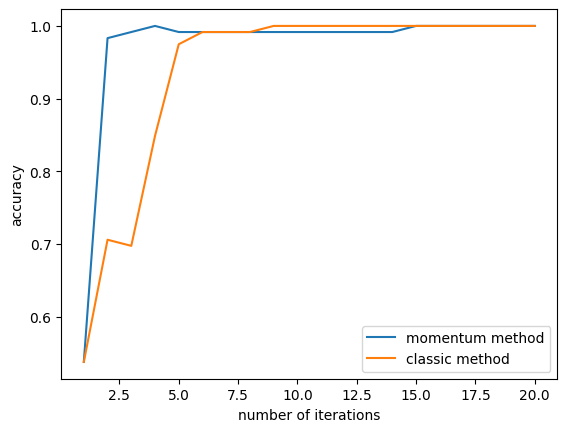

learning rate : 1
iteration :  20


In [95]:
plt.plot(list_index_momentum,list_accuracy_momentum,label="momentum method")
plt.plot(list_index_gradient,list_accuracy_gradient, label="classic method")
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print("learning rate :",perceptron.learning_rate)
print("iteration : ", c)

In [101]:
#This code evaluates the accuracy of a perceptron model across various combinations of learning rates and momentum values...
#It outputs a 2D array where each element represents the mean accuracy achieved with a specific learning rate and momentum combination after multiple training iterations.

import numpy as np
import matplotlib.pyplot as plt

# Define the ranges of learning rates and momentum to be tested
learning_rates = [0.001 * (10 ** i) for i in range(6)]
momentums = [0.1 * i for i in range(1, 11)]
accuracy_array = np.zeros((len(learning_rates), len(momentums)))

# Repeat the experiment for each combination of learning rate and momentum
for i, lr in enumerate(learning_rates):
    for j, mom in enumerate(momentums):
        accuracies = []  # List to record accuracies
        for _ in range(30):  # Repeat the experiment 30 times to smooth out the results
            perceptron = Perceptron(X_train, y_train, lr, momentum=mom)
            for _ in range(20):  # repete the training 20 times
                perceptron.train(1)
            average = perceptron.predict(X_test)
            accuracy = rate_accuracy(average, y_test)
            accuracies.append(accuracy)
        # Calculate the average accuracy for this configuration and save it
        mean_accuracy = sum(accuracies) / len(accuracies)
        accuracy_array[i, j] = mean_accuracy



In [102]:

max_index = np.unravel_index(accuracy_array.argmax(), accuracy_array.shape)
best_learning_rate = learning_rates[max_index[0]]
best_momentum = momentums[max_index[1]]
best_accuracy = accuracy_array[max_index]

print(f"The best learning rate: {best_learning_rate}")
print(f"The best momentum: {best_momentum}")
print(f"The best accuracy: {best_accuracy}")

The best learning rate: 1.0
The best momentum: 0.7000000000000001
The best accuracy: 1.0


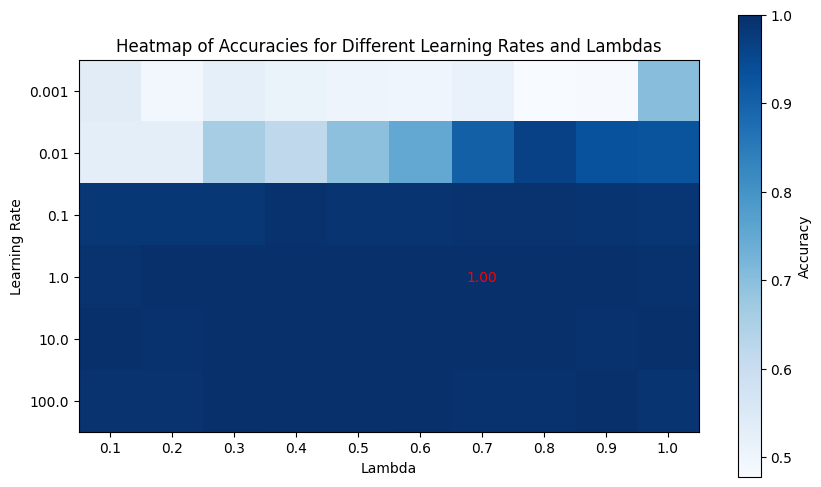

In [104]:
#Heatmap produced by chatgpt.

lambdas = [round(0.1 * i, 2) for i in range(1, 11)]

max_index = np.unravel_index(np.argmax(accuracy_array), accuracy_array.shape)

plt.figure(figsize=(10, 6))
plt.imshow(accuracy_array, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Accuracy')

max_value = accuracy_array[max_index]
plt.text(max_index[1], max_index[0], f'{max_value:.2f}', ha='center', va='center', color='red')

plt.xlabel('Lambda')
plt.ylabel('Learning Rate')
plt.xticks(ticks=np.arange(len(lambdas)), labels=[str(lmbd) for lmbd in lambdas])
plt.yticks(ticks=np.arange(len(learning_rates)), labels=[str(lr) for lr in learning_rates])

plt.title('Heatmap of Accuracies for Different Learning Rates and Lambdas')
plt.show()

In [ ]:
#Second perceptron with the mean square error in cost function with the momentum method.

In [38]:
neuron = SigmoidNeuron(X_train,y_train,learning_rate=10,momentum=0.4)
list_accuracy_mse=[]
list_index_mse=[]
for k in range(20):
    neuron.train(1)
    average=neuron.predict(X_test)
    accuracy_mse=rate_accuracy(average,y_test)
    print(accuracy_mse)
    list_accuracy_mse.append(accuracy_mse)
    list_index_mse.append(k)
    predictions = neuron.predict(X_test)

0.8823529411764706
0.8571428571428571
0.9747899159663865
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
0.9915966386554622
1.0
1.0
1.0
1.0
1.0


In [36]:
#This code evaluates the accuracy of a perceptron model across various combinations of learning rates and momentum values...
#It outputs a 2D array where each element represents the mean accuracy achieved with a specific learning rate and momentum combination after multiple training iterations.

import numpy as np
import matplotlib.pyplot as plt

# Define the ranges of learning rates and momentum to be tested
learning_rates = [0.001 * (10 ** i) for i in range(6)]
momentums = [0.1 * i for i in range(1, 11)]
accuracy_array = np.zeros((len(learning_rates), len(momentums)))

# Repeat the experiment for each combination of learning rate and momentum
for i, lr in enumerate(learning_rates):
    for j, mom in enumerate(momentums):
        accuracies = []  # List to record accuracies
        for _ in range(30):  # Repeat the experiment 30 times to smooth out the results
            perceptron = SigmoidNeuron(X_train, y_train, lr, momentum=mom)
            for _ in range(20):  # repete the training 20 times
                perceptron.train(1)
            average = perceptron.predict(X_test)
            accuracy = rate_accuracy(average, y_test)
            accuracies.append(accuracy)
        # Calculate the average accuracy for this configuration and save it
        mean_accuracy = sum(accuracies) / len(accuracies)
        accuracy_array[i, j] = mean_accuracy

c:\Users\Victor\Desktop\devoir eurecom\2023-2024\malis\projet2\perceptron3.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


In [37]:
max_index = np.unravel_index(accuracy_array.argmax(), accuracy_array.shape)
best_learning_rate = learning_rates[max_index[0]]
best_momentum = momentums[max_index[1]]

print(f"The best learning rate: {best_learning_rate}")
print(f"The best momentum: {best_momentum}")

The best learning rate: 10.0
The best momentum: 0.4


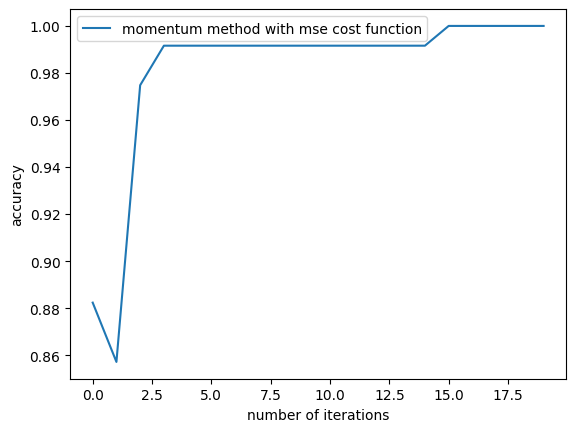

In [40]:
plt.plot(list_index_mse,list_accuracy_mse,label="momentum method with mse cost function")
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
plt.legend()
plt.show()